# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Import libraries to ignore all warning messages
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read data from Google Drive

# Import the necessary library to mount Google Drive folders in Google Colab
from google.colab import drive

# Mount Drive folder
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
# Importing random number generation and datetime functionalities
import random

# Importing libraries for efficient numerical operations and data manipulation
import numpy as np
import pandas as pd

# Importing the skewness function from the scipy.stats module
from scipy.stats import skew

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Library for working with HDF5 files
import h5py

# TensorFlow library for deep learning
import tensorflow as tf

# Functions from Keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, LeakyReLU
from tensorflow.keras.optimizers import Adamax, Adam

# Keras backend module
from tensorflow.keras import backend

# Classification metrics from scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

**Let us check the version of tensorflow.**

In [ ]:
print("> TensorFlow version:", tf.__version__)

> TensorFlow version: 2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
# Open the HDF5 file in read-only mode
file = h5py.File('/content/drive/MyDrive/MIT/SVHN_single_grey1.h5', 'r')

In [ ]:
# Display the keys (group names) in the HDF5 file (top-level structure of the file)
keys = list(file.keys())
print('> SVHN_single_grey1.h5 file keys:')
[print(f" - Key {index}: {key}") for index, key in enumerate(keys)];

> SVHN_single_grey1.h5 file keys:
 - Key 0: X_test
 - Key 1: X_train
 - Key 2: X_val
 - Key 3: y_test
 - Key 4: y_train
 - Key 5: y_val


In [ ]:
# Read the content of X_test dataset
X_test_nn = np.array(file['X_test'])
X_train_nn = np.array(file['X_train'])
X_val_nn = np.array(file['X_val'])
Y_test_nn = np.array(file['y_test'])
Y_train_nn = np.array(file['y_train'])
Y_val_nn = np.array(file['y_val'])

Check the number of images in the training and the testing dataset.

In [ ]:
# Print input data properties
print('> HDF5 Key - variable name - variable type - shape - data type - number of images:',sep = '')
print(' - X_test  - X_test_nn  - ',type(X_test_nn),' - ',X_test_nn.shape,' - ',X_test_nn.dtype,' - ',X_test_nn.shape[0],' images',sep = '')
print(' - X_train - X_train_nn - ',type(X_train_nn),' - ',X_train_nn.shape,' - ',X_train_nn.dtype,' - ',X_train_nn.shape[0],' images',sep = '')
print(' - X_val   - X_val_nn   - ',type(X_val_nn),' - ',X_val_nn.shape,' - ',X_val_nn.dtype,' - ',X_val_nn.shape[0],' images',sep = '')
print(' - y_test  - y_test_nn  - ',type(Y_test_nn),' - ',Y_test_nn.shape,'        - ',Y_test_nn.dtype,'   - ',Y_test_nn.shape[0],' images',sep = '')
print(' - y_train - y_train_nn - ',type(Y_train_nn),' - ',Y_train_nn.shape,'        - ',Y_train_nn.dtype,'   - ',Y_train_nn.shape[0],' images',sep = '')
print(' - y_val   - y_val_nn   - ',type(Y_val_nn),' - ',Y_val_nn.shape,'        - ',Y_val_nn.dtype,'   - ',Y_val_nn.shape[0],' images',sep = '')

> HDF5 Key - variable name - variable type - shape - data type - number of images:
 - X_test  - X_test_nn  - <class 'numpy.ndarray'> - (18000, 32, 32) - float32 - 18000 images
 - X_train - X_train_nn - <class 'numpy.ndarray'> - (42000, 32, 32) - float32 - 42000 images
 - X_val   - X_val_nn   - <class 'numpy.ndarray'> - (60000, 32, 32) - float32 - 60000 images
 - y_test  - y_test_nn  - <class 'numpy.ndarray'> - (18000,)        - uint8   - 18000 images
 - y_train - y_train_nn - <class 'numpy.ndarray'> - (42000,)        - uint8   - 42000 images
 - y_val   - y_val_nn   - <class 'numpy.ndarray'> - (60000,)        - uint8   - 60000 images


Statistical analysis of the data.

In [ ]:
# Find minimum and maximum values for X_test, X_train and X_val
print("> Minimum and Maximum values:")
print(" - X_train: ", np.min(X_train_nn),' - ', np.max(X_train_nn),sep='')
print(" - X_test:  ", np.min(X_test_nn),' - ', np.max(X_test_nn),sep='')
print(" - X_val:   ", np.min(X_val_nn),' - ', np.max(X_val_nn),sep='')

> Minimum and Maximum values:
 - X_train: 0.0 - 254.9745
 - X_test:  0.0 - 254.9745
 - X_val:   0.0 - 254.9745


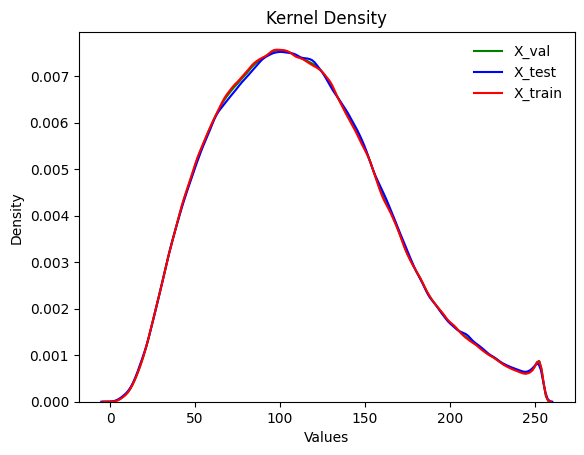

In [ ]:
# KDE Kernel Density Estimation Plot

# Plot KDE for X_test_nn, X_train_nn and X_val_nn
sns.kdeplot(X_val_nn.flatten(), color='green', fill=False, label='X_val')
sns.kdeplot(X_test_nn.flatten(), color='blue', fill=False, label='X_test')
sns.kdeplot(X_train_nn.flatten(), color='red', fill=False, label='X_train')

# Set plot labels, title, and legend
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Kernel Density')
plt.legend(frameon=False)

# Show the plot
plt.show()

In [ ]:
# Find unique values
print("> Unique values:")
print(" - y_train: ",np.unique(Y_train_nn),sep='')
print(" - y_test:  ",np.unique(Y_test_nn),sep='')
print(" - y_val:   ",np.unique(Y_val_nn),sep='')

> Unique values:
 - y_train: [0 1 2 3 4 5 6 7 8 9]
 - y_test:  [0 1 2 3 4 5 6 7 8 9]
 - y_val:   [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Function to calculate and print basic statistical metrics for a given array
def print_statistics(array, label):
    print(f"> Statistics for {label}:")
    print(f" - Mean: {np.mean(array):.2f}")
    print(f" - Median: {np.median(array):.2f}")
    print(f" - Standard Deviation: {np.std(array):.2f}")
    print(f" - Minimum: {np.min(array)}")
    print(f" - Maximum: {np.max(array)}")
    print(f" - 25th Percentile: {np.percentile(array, 25):.2f}")
    print(f" - 75th Percentile: {np.percentile(array, 75):.2f}")
    print(f" - Skewness: {skew(array):.2f}\n")

In [ ]:
# Find mean values
print_statistics(Y_train_nn,"y_train")
print_statistics(Y_test_nn,"y_test")
print_statistics(Y_val_nn,"y_val")

> Statistics for y_train:
 - Mean: 4.50
 - Median: 4.00
 - Standard Deviation: 2.87
 - Minimum: 0
 - Maximum: 9
 - 25th Percentile: 2.00
 - 75th Percentile: 7.00
 - Skewness: 0.00

> Statistics for y_test:
 - Mean: 4.50
 - Median: 5.00
 - Standard Deviation: 2.88
 - Minimum: 0
 - Maximum: 9
 - 25th Percentile: 2.00
 - 75th Percentile: 7.00
 - Skewness: -0.01

> Statistics for y_val:
 - Mean: 4.50
 - Median: 4.50
 - Standard Deviation: 2.87
 - Minimum: 0
 - Maximum: 9
 - 25th Percentile: 2.00
 - 75th Percentile: 7.00
 - Skewness: 0.00



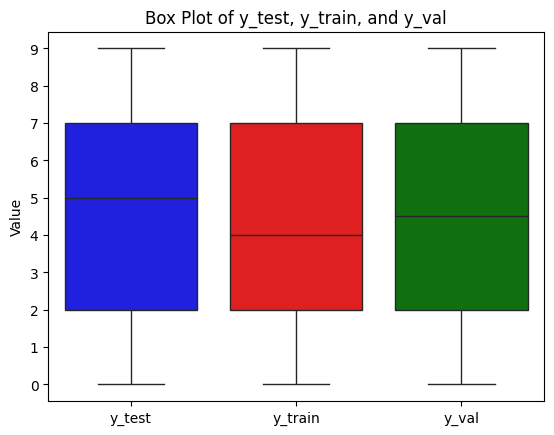

In [ ]:
# Plot box plots for y_test, y_train andy_val
datasets = ['y_test', 'y_train', 'y_val']
boxplot = sns.boxplot(data=[Y_test_nn, Y_train_nn, Y_val_nn], palette=['blue', 'red', 'green'])

# Set custom labels for the boxes
boxplot.set_xticklabels(datasets)

# Set custom y-axis ticks
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Set plot labels and title
plt.ylabel('Value')
plt.title('Box Plot of y_test, y_train, and y_val')

# Show the plot
plt.show()

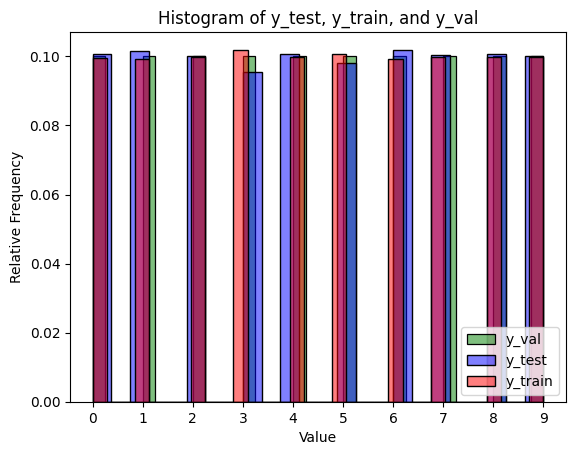

In [ ]:
# Histogram of y_test, y_train, and y_val with relative frequencies
sns.histplot(Y_val_nn, color='green', alpha=0.5, label='y_val', multiple="dodge", stat='probability')
sns.histplot(Y_test_nn, color='blue', alpha=0.5, label='y_test', multiple="dodge", stat='probability')
sns.histplot(Y_train_nn, color='red', alpha=0.5, label='y_train', multiple="dodge", stat='probability')

# Set custom x-axis ticks
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Set plot labels and title
plt.xlabel('Value')
plt.ylabel('Relative Frequency')
plt.title('Histogram of y_test, y_train, and y_val')
plt.legend(loc='lower right')
plt.show()

**Observations:**

* The HDF5 file (SVHN_single_grey1.h5) includes six distinctive data groups: X_train, X_test, X_val, y_train, y_test, and y_val.
* The X_test group, presented as a three-dimensional array, corresponds to 18,000 grayscale images of size  32x32. The pixel values are stored as float32 numbers. Correspondingly, the y_test variable is one-dimensional, containing labels for each of these images (stored as uint8).
* The X_train group, also a three-dimensional array, corresponds to 42,000 grayscale images of size 32x32, with pixel values stored as float32 numbers. The y_train variable, a one-dimensional array, holds labels for each image (stored as uint8).
* Additionally, the X_val group comprises 60,000 images of size 32x32, with pixel values stored as float32 numbers. The Y_val variable contains 60,000 labels, stored as uint8.
* The Kernel Density Estimates (KDE) of each dataset exhibit approximately the same distribution across the possible values ranging from 0 to 255.
* Across the three datasets, the labels cover the integer values in the numerical range of 0 to 9.
* The mean of y_train, y_test, and y_val is 4.5. The standard deviation is approximately the same across all three datasets (2.87). The 25th and 75th percentiles are equal, both being 2 and 7, respectively. There is a slight deviation in skewness in the test set (-0.01) compared to the test/val datasets (0.00) and the median values differ. The median of y_train is 4, while the median of y_test is 5.
* The dataset used in this work for training corresponds to the X/y_train datasets, and the test dataset to the X/y_test datasets.

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

In [ ]:
# First ten labels
print('> First ten labels: ',Y_train_nn[0:10],sep='')

> First ten labels: [2 6 7 4 4 0 3 0 7 3]


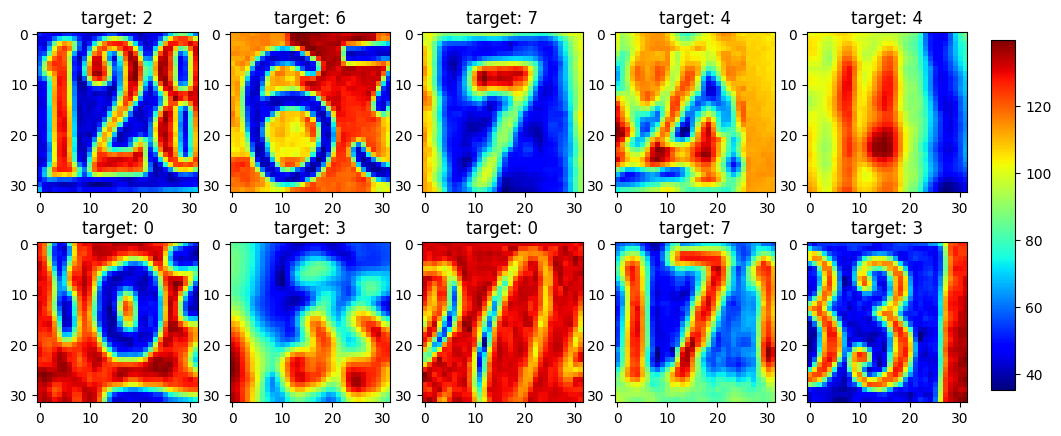

In [ ]:
# Declaring the number of rows and columns
rows = 2
cols = 5

# Creating a figure with specified size
fig = plt.figure(figsize=(12, 5))

# Loop over the subplots
for i in range(cols * rows):
    ax = fig.add_subplot(rows, cols, i + 1)
    im = ax.imshow(X_train_nn[i, :], cmap='jet')
    ax.set_title('target: ' + str(Y_train_nn[i]))
    ax.set_xticks([0, 10, 20, 30])

# Add a common colorbar for all subplots
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

# Display the plot
plt.show()

**Observations:**

* Numerical characters are defined by distinct shapes and may be filled with varying pixel values.
* Certain images may not fully capture the entire numerical character.
* There are cases where an image contains more than one numerical character.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

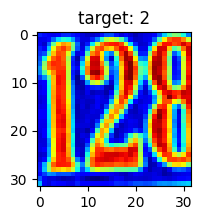

In [ ]:
# Plot the first image in the training dataset
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(X_train_nn[0], cmap='jet')
ax.set_title('target: ' + str(Y_train_nn[0]))
ax.set_xticks([0, 10, 20, 30])
plt.show()

In [ ]:
# Print the shape of the first image
print('> Shape of the first image: ',X_train_nn[0].shape,sep='')

> Shape of the first image: (32, 32)


In [ ]:
# Print the 2D array of pixeis
print('> Array of pixels for the first image in the training dataset:\n\n',X_train_nn[0])

> Array of pixels for the first image in the training dataset:

 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
# Normalize X_train/test (255 -> 1)
X_train_nn_normalized = X_train_nn / 255
X_test_nn_normalized = X_test_nn / 255

In [ ]:
# Find minimum and maximum values for X_test, X_train and X_val
print("> Minimum and Maximum values after normalization:")
print(" - X_train_nn_normalized: ",np.min(X_train_nn_normalized),' - ',np.max(X_train_nn_normalized),sep='')
print(" - X_test_nn_normalized:  ",np.min(X_test_nn_normalized),' - ',np.max(X_test_nn_normalized),sep='')

> Minimum and Maximum values after normalization:
 - X_train_nn_normalized: 0.0 - 0.9999
 - X_test_nn_normalized:  0.0 - 0.9999


Print the shapes of Training and Test data

In [ ]:
# Print the shapes of Training and Test data before normalization
print('> Shapes of Training and Test data before normalization:')
print(' - X_train_nn - ',X_train_nn.shape,sep='')
print(' - X_test_nn  - ',X_test_nn.shape,sep='')

> Shapes of Training and Test data before normalization:
 - X_train_nn - (42000, 32, 32)
 - X_test_nn  - (18000, 32, 32)


In [ ]:
# Print the shapes of Training and Test data after normalization
print('> Shapes of Training and Test data after normalization:')
print(' - X_train_nn_normalized - ',X_train_nn_normalized.shape,sep='')
print(' - X_test_nn_normalized  - ',X_test_nn_normalized.shape,sep='')

> Shapes of Training and Test data after normalization:
 - X_train_nn_normalized - (42000, 32, 32)
 - X_test_nn_normalized  - (18000, 32, 32)


**Observations:**

* As expected, the structure of the normalized data remains unchanged after the normalization operation. However, the range has now been rescaled from 0-255 to 0-1.
* Normalization helps to avoid exploding gradient problems, reducing the chances of getting stuck at local optima.
* Normalization makes the training faster, and weight decay (technique to prevent overfitting) and estimation can be done more conveniently.

### **One-hot encode output**

In [ ]:
# One-hot encode the labels
Y_test_nn_encoded = to_categorical(Y_test_nn)
Y_train_nn_encoded = to_categorical(Y_train_nn)

In [ ]:
# Print the One-hot encoded labels
print("> One-hot encoded labels:\n\n", Y_train_nn_encoded)

> One-hot encoded labels:

 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Print the shapes of Training and Test data before One-hot encoding
print('> Shapes of Training and Test data before One-hot encoding:')
print(' - Y_train_nn - ',Y_train_nn.shape,sep='')
print(' - Y_test_nn  - ',Y_test_nn.shape,sep='')

> Shapes of Training and Test data before One-hot encoding:
 - Y_train_nn - (42000,)
 - Y_test_nn  - (18000,)


In [ ]:
# Print the shapes of Training and Test data after One-hot encoding
print('> Shapes of Training and Test data after One-hot encoding:')
print(' - Y_train_nn_encoded - ',Y_train_nn_encoded.shape,sep='')
print(' - Y_test_nn_encoded  - ',Y_test_nn_encoded.shape,sep='')

> Shapes of Training and Test data after One-hot encoding:
 - Y_train_nn_encoded - (42000, 10)
 - Y_test_nn_encoded  - (18000, 10)


**Observations:**

* The shape of the encoded data changes after the One-hot encoding operation.
* In contrast to the original integer labels within the range 0-9, each label is now represented as an array. This array follows a one-hot encoding scheme, where each integer value is expressed as a binary array containing all zeros except for a single one at the position corresponding to that integer value.
* Since this is a 10 class classification problem (0-9), the output layer should have 10 neurons. The SoftMax activation function will provide the probabilities of the input image belonging to each of those 10 classes. This function converts a vector of K real numbers into a probability distribution of K possible outcomes, ensuring that they sum to 1. It is a generalization of the logistic function to multiple dimensions.


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
# Initialize a sequential model
nn_model_1 = Sequential(name='nn_model_1', layers=[

  # Input layer
  Input(shape=(1024,), name='Input_layer'),

  # First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
  Dense(64, activation='relu', name='Dense_1'),

  # Second hidden layer with 32 nodes and the relu activation
  Dense(32, activation='relu', name='Dense_2'),

  # Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10
  Dense(10, activation='softmax', name='Output_layer')

])

In [ ]:
# Printing the model summary
nn_model_1.summary()

Model: "nn_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 64)                65600     
                                                                 
 Dense_2 (Dense)             (None, 32)                2080      
                                                                 
 Output_layer (Dense)        (None, 10)                330       
                                                                 
Total params: 68,010
Trainable params: 68,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Create function to represent the neural network
def plot_nnmodel(model,model_name,figure_size):

  # Visualize the model
  plot_model = tf.keras.utils.plot_model(model, show_shapes=True, to_file=model_name + '.png')

  # Display the plot using pyplot
  plt.figure(figsize=figure_size)
  plt.imshow(plt.imread(model_name + '.png'))
  plt.axis('off')
  plt.show()

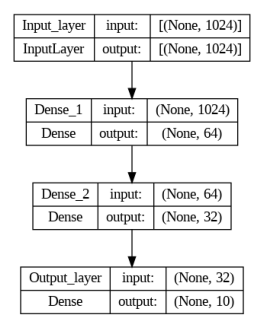

In [ ]:
# Representation of the nn_model_1 model
plot_nnmodel(nn_model_1,'nn_model_1',(4,4))

In [ ]:
# Compile the Sequential model
nn_model_1.compile(

    # Set the loss function to categorical crossentropy
    loss='categorical_crossentropy',

    # Use the Adamax optimizer with a learning rate of 0.001
    optimizer=Adamax(learning_rate=0.001),

    # Specify the metric for evaluation as accuracy
    metrics=['accuracy']
)

### **Plot the Training and Validation Accuracies and write down your Observations.**

In [ ]:
# Reshape X_train/test
X_train_nn_reshaped = X_train_nn_normalized.reshape((X_train_nn_normalized.shape[0], -1))
X_test_nn_reshaped = X_test_nn_normalized.reshape((X_test_nn_normalized.shape[0], -1))

In [ ]:
# Print the first two rows of the first image
print('> Print the first two rows of the first image:\n')
print(X_train_nn_normalized[0,0,:])
print(X_train_nn_normalized[0,1,:])

> Print the first two rows of the first image:

[0.12968785 0.11866706 0.10530196 0.10150745 0.1119298  0.13006786
 0.13296823 0.1226549  0.10718157 0.09394353 0.08373255 0.08833648
 0.09524235 0.12247922 0.14624195 0.14971608 0.12113804 0.09603412
 0.10973725 0.09162392 0.07755843 0.09025843 0.09692863 0.09801608
 0.10811804 0.15116628 0.20719254 0.2584459  0.2884741  0.2801847
 0.2283153  0.16860352]
[0.09893451 0.10020902 0.1175549  0.16062745 0.2119051  0.23816353
 0.22586863 0.18808275 0.12945215 0.09543608 0.0956051  0.1301949
 0.17307411 0.23992746 0.3157953  0.33793882 0.31279254 0.2611345
 0.18624549 0.11668549 0.08580549 0.09017373 0.09914588 0.10443255
 0.15604824 0.25471804 0.35718235 0.42697844 0.44552118 0.4432192
 0.40534863 0.33056822]


In [ ]:
# Print the first two rows of the first image for the reshaped array
print('> Print the first two rows of the first image for the reshaped array:\n')
print(X_train_nn_reshaped[0,0:64])

> Print the first two rows of the first image for the reshaped array:

[0.12968785 0.11866706 0.10530196 0.10150745 0.1119298  0.13006786
 0.13296823 0.1226549  0.10718157 0.09394353 0.08373255 0.08833648
 0.09524235 0.12247922 0.14624195 0.14971608 0.12113804 0.09603412
 0.10973725 0.09162392 0.07755843 0.09025843 0.09692863 0.09801608
 0.10811804 0.15116628 0.20719254 0.2584459  0.2884741  0.2801847
 0.2283153  0.16860352 0.09893451 0.10020902 0.1175549  0.16062745
 0.2119051  0.23816353 0.22586863 0.18808275 0.12945215 0.09543608
 0.0956051  0.1301949  0.17307411 0.23992746 0.3157953  0.33793882
 0.31279254 0.2611345  0.18624549 0.11668549 0.08580549 0.09017373
 0.09914588 0.10443255 0.15604824 0.25471804 0.35718235 0.42697844
 0.44552118 0.4432192  0.40534863 0.33056822]


In [ ]:
# Print reshaped array
print('> Reshaped array: (shape, dtype)')
print(' - X_train_nn_reshaped - ',X_train_nn_reshaped.shape,' - ',type(X_train_nn_reshaped),sep='')
print(' - X_test_nn_reshaped  - ',X_test_nn_reshaped.shape,' - ',type(X_test_nn_reshaped),sep='')

> Reshaped array: (shape, dtype)
 - X_train_nn_reshaped - (42000, 1024) - <class 'numpy.ndarray'>
 - X_test_nn_reshaped  - (18000, 1024) - <class 'numpy.ndarray'>


In [ ]:
# Fit the Sequential model on the training data
nn_model_1_fit = nn_model_1.fit(

    # Input features of the training data
    X_train_nn_reshaped,

    # Encoded labels of the training data
    Y_train_nn_encoded,

    # Number of training epochs
    epochs=20,

    # Fraction of training data for validation
    validation_split=0.2,

    # Batch size for optimization
    batch_size=128,

    # Display progress during training
    verbose=1

)

Epoch 1/20
263/263 [==============================] - 4s 11ms/step - loss: 2.2931 - accuracy: 0.1284 - val_loss: 2.2718 - val_accuracy: 0.1300
Epoch 2/20
263/263 [==============================] - 2s 8ms/step - loss: 2.2014 - accuracy: 0.2516 - val_loss: 2.1191 - val_accuracy: 0.2988
Epoch 3/20
263/263 [==============================] - 2s 6ms/step - loss: 2.0232 - accuracy: 0.3346 - val_loss: 1.9285 - val_accuracy: 0.3605
Epoch 4/20
263/263 [==============================] - 2s 7ms/step - loss: 1.8374 - accuracy: 0.3928 - val_loss: 1.7598 - val_accuracy: 0.4298
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.6887 - accuracy: 0.4536 - val_loss: 1.6371 - val_accuracy: 0.4721
Epoch 6/20
263/263 [==============================] - 2s 9ms/step - loss: 1.5778 - accuracy: 0.5013 - val_loss: 1.5454 - val_accuracy: 0.5135
Epoch 7/20
263/263 [==============================] - 3s 11ms/step - loss: 1.4936 - accuracy: 0.5380 - val_loss: 1.4703 - val_accuracy: 0.5507
Epoc

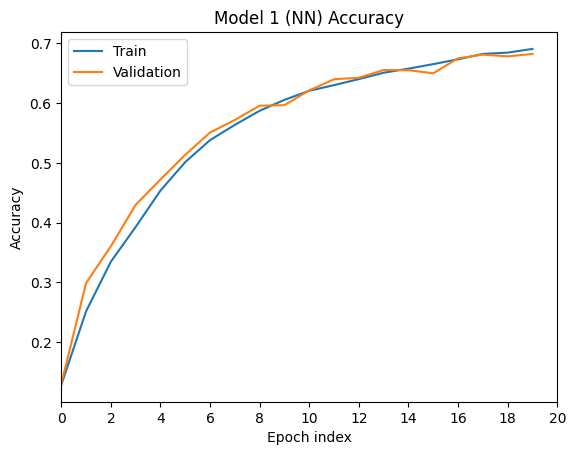

In [ ]:
# Plotting the model accuracy over epochs
fig = plt.figure()

# Retrieve and plot the training/validation accuracy
plt.plot(nn_model_1_fit.history['accuracy'], label='Train')
plt.plot(nn_model_1_fit.history['val_accuracy'], label='Validation')

# Creating a figure with specified size


# Title and labels for the plot
plt.title('Model 1 (NN) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch index')

# Set x-axis ticks from 0 to 20
plt.xticks(range(0, 21, 2))
plt.xlim(0, 20)  # Adjust the range accordingly

# Displaying the legend in the upper-left corner
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Last accuracy
print('> Last accuracy:',round(nn_model_1_fit.history['accuracy'][-1],2))

> Last accuracy: 0.69


In [ ]:
# Create a new DataFrame to store the variables of each model
# Model: model name; Dense: number of Dense layers; Batch Norm.: number of Bach Normalization layers;
# Dropout: Number of Dropout layers; Conv.: Number of Convolution layers; LeakyRelu: Number of LeakyRelu layers;
# Max-pooling: Number of Max-pooling layers; Optimizer: optimizer; Val. split: validation split;
# Batch sizer: batch size; Epochs: number of epochs; Parameters: number of network parameters (weights and biases)
# Max. A: maximum accuracy; Max. validation accuracy: maximum validation accuracy;
columns = ['Model', 'Dense', 'Batch Norm.', 'Dropout', 'Conv.', 'LeakyRelu', 'Max-pooling', 'Optimizer',
           'Val. split', 'Batch size', 'Epochs', 'Parameters', 'Max. A', 'Max. VA']
model_df = pd.DataFrame(columns=columns)

# Add entries to the DataFrame
new_data = {'Model': 'nn_model_1', 'Dense': 3, 'Batch Norm.': 0, 'Dropout': 0, 'Conv.': 0, 'LeakyRelu': 0, 'Max-pooling': 0,
            'Optimizer': 'Adam(lr = 0.001)', 'Val. split': 0.2, 'Batch size': 128, 'Epochs': 20, 'Parameters': 68010,
            'Max. A': round(np.max(nn_model_1_fit.history['accuracy']),2), 'Max. VA': round(np.max(nn_model_1_fit.history['val_accuracy']),2)}

model_df = model_df.append(new_data, ignore_index=True)

# Display the dataset
model_df.head()

,Model,Dense,Batch Norm.,Dropout,Conv.,LeakyRelu,Max-pooling,Optimizer,Val. split,Batch size,Epochs,Parameters,Max. A,Max. VA
0,nn_model_1,3,0,0,0,0,0,Adam(lr = 0.001),0.2,128,20,68010,0.69,0.68


**Observations:**

* This ANN model (nn_model_1) , consists of three dense layers, collectively training and learning 68,010 parameters (weights and biases).
* The plotted accuracy and validation accuracy show no significant difference, suggesting that the model is not exhibiting signs of overfitting to the training data.
* Initially, there is a substantial variation in accuracy with the number of epochs. After 8 epochs, the model's accuracy increases slowly, reaching a values in the range of 0.65-0.69.
* Given the simplicity of this model, comprising only small three dense layers, it doesn't demand excessive computational resources (local run time: $\sim$ 0.7 min).

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
# Define a sequential model with layers
nn_model_2 = Sequential(name='nn_model_2', layers=[

    # Input layer
    Input(shape=(1024,), name='Input_layer'),

    # First hidden layer with 256 nodes and ReLU activation
    Dense(256, activation='relu', name='Dense_1'),

    # Second hidden layer with 128 nodes and ReLU activation
    Dense(128, activation='relu', name='Dense_2'),

    # Dropout layer with a dropout rate of 0.2
    Dropout(0.2, name='Dropout'),

    # Third hidden layer with 64 nodes and ReLU activation
    Dense(64, activation='relu', name='Dense_3'),

    # Fourth hidden layer with 64 nodes and ReLU activation
    Dense(64, activation='relu', name='Dense_4'),

    # Fifth hidden layer with 32 nodes and ReLU activation
    Dense(32, activation='relu', name='Dense_5'),

    # BatchNormalization layer
    BatchNormalization(name='Batch_norm'),

    # Output layer with 10 nodes and softmax activation
    Dense(10, activation='softmax', name='Output')
])

In [ ]:
# Printing the model summary
nn_model_2.summary()

Model: "nn_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 256)               262400    
                                                                 
 Dense_2 (Dense)             (None, 128)               32896     
                                                                 
 Dropout (Dropout)           (None, 128)               0         
                                                                 
 Dense_3 (Dense)             (None, 64)                8256      
                                                                 
 Dense_4 (Dense)             (None, 64)                4160      
                                                                 
 Dense_5 (Dense)             (None, 32)                2080      
                                                                 
 Batch_norm (BatchNormalizat  (None, 32)               1

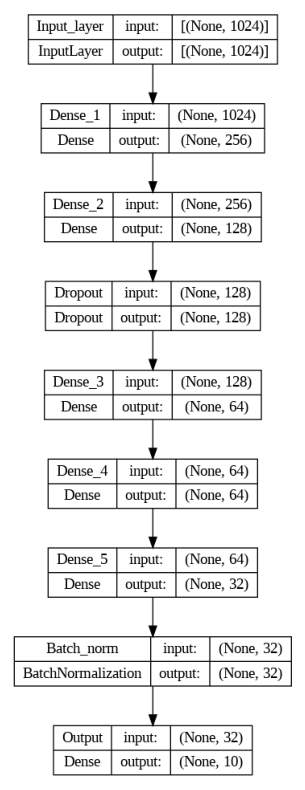

In [ ]:
# plot this nn_model_2
plot_nnmodel(nn_model_2,'nn_model_2',(10,10))

In [ ]:
# Compile the Sequential model
nn_model_2.compile(

    # Set the loss function to categorical crossentropy
    loss='categorical_crossentropy',

    # Use the Adamax optimizer with a learning rate of 0.0005
    optimizer=Adamax(learning_rate=0.0005),

    # Specify the metric for evaluation as accuracy
    metrics=['accuracy']
)

In [ ]:
# Fit the Sequential model on the training data
nn_model_2_fit = nn_model_2.fit(

    # Input features of the training data
    X_train_nn_reshaped,

    # Encoded labels of the training data
    Y_train_nn_encoded,

    # Number of training epochs
    epochs=30,

    # Fraction of training data for validation
    validation_split=0.2,

    # Batch size for optimization
    batch_size=128,

    # Display progress during training
    verbose=1

)

Epoch 1/30
263/263 [==============================] - 7s 17ms/step - loss: 2.3368 - accuracy: 0.1033 - val_loss: 2.3003 - val_accuracy: 0.1115
Epoch 2/30
263/263 [==============================] - 3s 13ms/step - loss: 2.2749 - accuracy: 0.1391 - val_loss: 2.2454 - val_accuracy: 0.2026
Epoch 3/30
263/263 [==============================] - 3s 13ms/step - loss: 1.9777 - accuracy: 0.2969 - val_loss: 1.8144 - val_accuracy: 0.4044
Epoch 4/30
263/263 [==============================] - 5s 20ms/step - loss: 1.7011 - accuracy: 0.4128 - val_loss: 1.5368 - val_accuracy: 0.4970
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 1.5312 - accuracy: 0.4858 - val_loss: 1.3850 - val_accuracy: 0.5535
Epoch 6/30
263/263 [==============================] - 4s 14ms/step - loss: 1.3967 - accuracy: 0.5399 - val_loss: 1.2450 - val_accuracy: 0.6074
Epoch 7/30
263/263 [==============================] - 4s 17ms/step - loss: 1.2975 - accuracy: 0.5781 - val_loss: 1.2802 - val_accuracy: 0.5735

### **Plot the Training and Validation Accuracies and write down your Observations.**

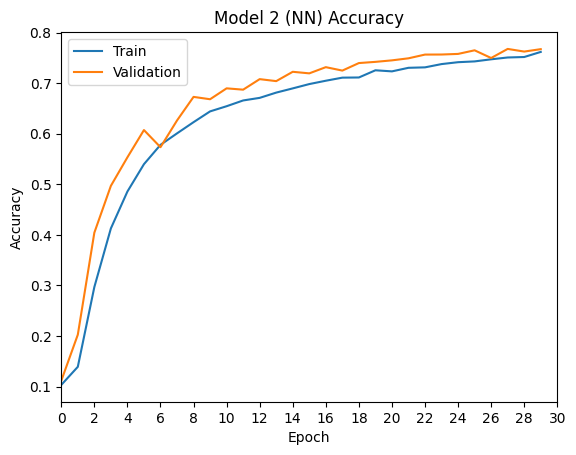

In [ ]:
# Plotting the model accuracy over epochs
fig = plt.figure()

# Plot the training/validation accuracy
plt.plot(nn_model_2_fit.history['accuracy'], label='Train')
plt.plot(nn_model_2_fit.history['val_accuracy'], label='Validation')

# Title and labels for the plot
plt.title('Model 2 (NN) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Set x-axis ticks from 0 to 20
plt.xticks(range(0, 31, 2))
plt.xlim(0, 30)  # Adjust the range accordingly

# Displaying the legend in the upper-left corner
plt.legend(loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Add entries to the model_df DataFrame
new_data = {'Model': 'nn_model_2', 'Dense': 6, 'Batch Norm.': 1, 'Dropout': 1, 'Conv.': 0, 'LeakyRelu': 0, 'Max-pooling': 0,
            'Optimizer': 'Adam(lr = 0.0005)', 'Val. split': 0.2, 'Batch size': 128, 'Epochs': 30, 'Parameters': 310250,
            'Max. A': round(np.max(nn_model_2_fit.history['accuracy']),2), 'Max. VA': round(np.max(nn_model_2_fit.history['val_accuracy']),2)}

model_df = model_df.append(new_data, ignore_index=True)

# Display the new dataset
model_df.head()

,Model,Dense,Batch Norm.,Dropout,Conv.,LeakyRelu,Max-pooling,Optimizer,Val. split,Batch size,Epochs,Parameters,Max. A,Max. VA
0,nn_model_1,3,0,0,0,0,0,Adam(lr = 0.001),0.2,128,20,68010,0.69,0.68
1,nn_model_2,6,1,1,0,0,0,Adam(lr = 0.0005),0.2,128,30,310250,0.76,0.77


**Observations:**

* This ANN model (nn_model_2) consists of six dense layers, including a Batch Normalization Layer and a Dropout layer, collectively training and learning 310,250 parameters (weights and biases).
* Batch Normalization layers are crucial in deep neural networks as they standardize input data, mitigating issues like exploding gradients and promoting stable and efficient model training. This leads to improved convergence, faster learning, and enhanced generalization across diverse datasets.
* Dropout, employed as a regularization technique, mitigates overfitting by randomly excluding neurons during training, contributing robust generalization to unseen data and enhancing overall model performance.
* The accuracy graph reveals that, for the majority of epochs, the validation accuracy surpasses the training accuracy. However, this difference tends to decrease for higher epochs. Possible reasons include an insufficient size of the validation dataset, imbalanced validation data, or high regularization. This model has a Dropout layer, which is probably the cause of this behavior given the size and distribution of the input data. High regularization introduces noise during training, affecting the training accuracy more than the validation accuracy. To address this, one can consider reducing regularization or increasing the size of the validation set.
* In the plotted accuracy graph, the small difference between accuracy and validation accuracy observed for higher epochs suggests that the model is not exhibiting signs of overfitting to the training data.
* After around 10-12 epochs, the model's accuracy increases slowly.
* Despite the model's increased complexity and parameter count, computational resource demands remain reasonable, with runtime only a few times that of the initial model (local run time: $\sim$ 2.4 min).

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Making predictions on the test data
Y_pred_test_nn = nn_model_2.predict(X_test_nn_reshaped)

563/563 [==============================] - 2s 3ms/step


In [ ]:
# Print the first prediction
print('> First prediction:\n\n',Y_pred_test_nn[0])

> First prediction:

 [0.48019746 0.06409652 0.01984776 0.01833571 0.03568463 0.02217759
 0.07355335 0.01632147 0.11489833 0.15488718]


In [ ]:
# Converting probabilities to class labels
Y_pred_test_nn_classes = np.argmax(Y_pred_test_nn, axis = 1)

In [ ]:
# Print the first prediction (class)
print('> First prediction (class):',Y_pred_test_nn_classes[0])

> First prediction (class): 0


In [ ]:
# Calculating the probability of the predicted class
Y_pred_test_nn_max_probas = np.max(Y_pred_test_nn, axis = 1)

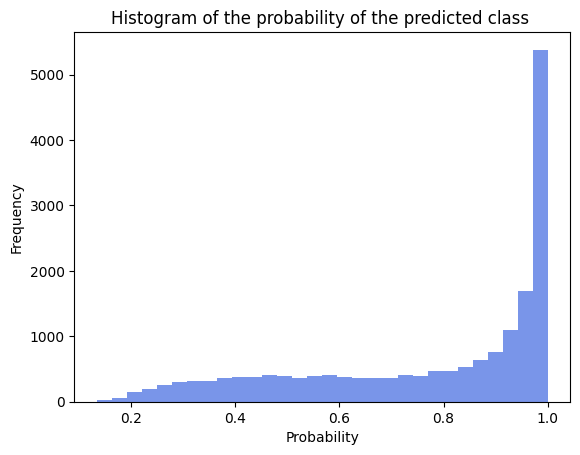

In [ ]:
# Distribution of the probability of the predicted class
plt.hist(Y_pred_test_nn_max_probas, bins=30, color='royalblue', alpha=0.7) #, edgecolor='black'
plt.title('Histogram of the probability of the predicted class ')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

In [ ]:
# Printing the classification report
print(classification_report(Y_test_nn, Y_pred_test_nn_classes))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1814
           1       0.68      0.86      0.76      1828
           2       0.86      0.72      0.79      1803
           3       0.73      0.72      0.73      1719
           4       0.80      0.83      0.82      1812
           5       0.74      0.72      0.73      1768
           6       0.71      0.80      0.75      1832
           7       0.77      0.82      0.79      1808
           8       0.78      0.66      0.71      1812
           9       0.81      0.70      0.75      1804

    accuracy                           0.77     18000
   macro avg       0.77      0.77      0.76     18000
weighted avg       0.77      0.77      0.77     18000



In [ ]:
# Save precision, recall, f1-score
precision_m2_nn, recall_m2_nn, f1_m2_nn, _ = precision_recall_fscore_support(Y_test_nn, Y_pred_test_nn_classes)

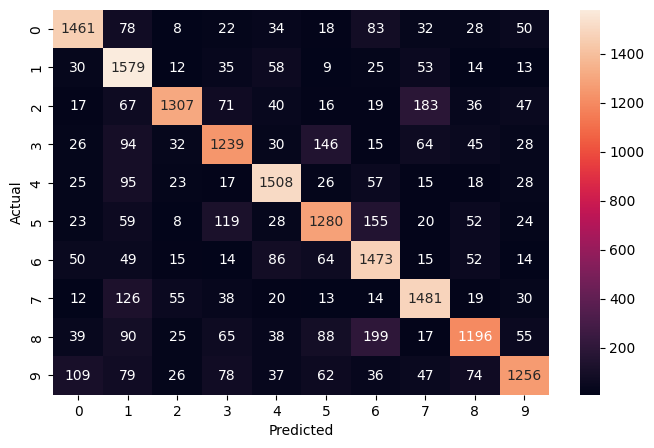

In [ ]:
# Plotting the heatmap using confusion matrix

# Calculating the confusion matrix
cm = confusion_matrix(Y_test_nn, Y_pred_test_nn_classes)

# Setting up the figure size
plt.figure(figsize=(8, 5))

# Creating a heatmap with annotations
sns.heatmap(cm, annot=True, fmt='.0f')

# Adding labels to axes
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Displaying the plot
plt.show()

**Final Observations:**

* The average precision, recall, and f1-score are approximately 0.77, indicating a generally satisfactory model performance across various categories. Nevertheless, this model may not be the ideal choice in scenarios where high average accuracies are crucial.
* There are 90 possible wrong actual/prediction combinations. Most of them exhibit relatively low counts. However, some specific combinations stand out with counts exceeding 100, as example 9/0. One possible reason for the misclassification of the correct label is that combinations involve pairs of numbers sharing common patterns, leading to similar output probability distributions.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Load again the train/test datasets
X_train_cnn = np.array(file['X_train'])
X_test_cnn = np.array(file['X_test'])
Y_train_cnn = np.array(file['y_train'])
Y_test_cnn = np.array(file['y_test'])

Check the number of images in the training and the testing dataset.

In [ ]:
# Print the input variables properties
print('> HDF5 Key - variable name - variable type - shape - data type - number of images:',sep = '')
print(' - X_test  - X_test_cnn  - ',type(X_test_cnn),' - ',X_test_cnn.shape,' - ',X_test_cnn.dtype,' - ',X_test_cnn.shape[0],' images',sep = '')
print(' - X_train - X_train_cnn - ',type(X_train_cnn),' - ',X_train_cnn.shape,' - ',X_train_cnn.dtype,' - ',X_train_cnn.shape[0],' images',sep = '')
print(' - y_test  - y_test_cnn  - ',type(Y_test_cnn),' - ',Y_test_cnn.shape,'        - ',Y_test_cnn.dtype,'   - ',Y_test_cnn.shape[0],' images',sep = '')
print(' - y_train - y_train_cnn - ',type(Y_train_cnn),' - ',Y_train_cnn.shape,'        - ',Y_train_cnn.dtype,'   - ',Y_train_cnn.shape[0],' images',sep = '')

> HDF5 Key - variable name - variable type - shape - data type - number of images:
 - X_test  - X_test_cnn  - <class 'numpy.ndarray'> - (18000, 32, 32) - float32 - 18000 images
 - X_train - X_train_cnn - <class 'numpy.ndarray'> - (42000, 32, 32) - float32 - 42000 images
 - y_test  - y_test_cnn  - <class 'numpy.ndarray'> - (18000,)        - uint8   - 18000 images
 - y_train - y_train_cnn - <class 'numpy.ndarray'> - (42000,)        - uint8   - 42000 images


**Observation:**
* The datasets were reloaded for different variables. The input data has to be reshaped since CNNs require 4D data.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

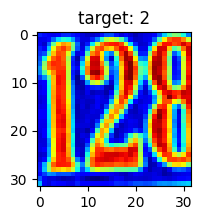

In [ ]:
# Plot the first image in the training dataset
fig, ax = plt.subplots(figsize=(2, 2))
ax.imshow(X_train_cnn[0], cmap='jet')
ax.set_title('target: ' + str(Y_train_cnn[0]))
ax.set_xticks([0, 10, 20, 30])
plt.show()

In [ ]:
# Print the shape of the first image
print('> Shape of the first image: ',X_train_cnn[0].shape,sep='')

> Shape of the first image: (32, 32)


In [ ]:
# Print the shape of the first image
print('> Shape of the first image:\n\n',X_train_cnn[0],sep='')

> Shape of the first image:

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Convert X_test/train_cnn to 4D
X_test_cnn_4D = np.expand_dims(X_test_cnn, axis=-1)
X_train_cnn_4D = np.expand_dims(X_train_cnn, axis=-1)

In [ ]:
# Print new shapes
print('> Shapes of Training and Test data:')
print(' - X_test_cnn_4D  - ',X_test_cnn_4D.shape,sep='')
print(' - X_train_cnn_4D - ',X_train_cnn_4D.shape,sep='')

> Shapes of Training and Test data:
 - X_test_cnn_4D  - (18000, 32, 32, 1)
 - X_train_cnn_4D - (42000, 32, 32, 1)


Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalize the X_test/train_4D data
X_test_cnn_4D_normalized = X_test_cnn_4D / 255
X_train_cnn_4D_normalized = X_train_cnn_4D / 255

In [ ]:
# Print the content of the 4D normalized data
print('> 4D normalized data: (variable type, shape, dtype)')
print(' - X_train_cnn_4D_normalized - ',type(X_train_cnn_4D_normalized),' - ',X_train_cnn_4D_normalized.shape,' - ',X_train_cnn_4D_normalized.dtype,sep = '')
print(' - X_test_cnn_4D_normalized  - ',type(X_test_cnn_4D_normalized),' - ',X_test_cnn_4D_normalized.shape,' - ',X_test_cnn_4D_normalized.dtype,sep = '')

> 4D normalized data: (variable type, shape, dtype)
 - X_train_cnn_4D_normalized - <class 'numpy.ndarray'> - (42000, 32, 32, 1) - float32
 - X_test_cnn_4D_normalized  - <class 'numpy.ndarray'> - (18000, 32, 32, 1) - float32


In [ ]:
# Find minimum and maximum values for X_test, X_train and X_val after conversion to 4D and normalization
print("> Minimum and Maximum values after conversion to 4D and normalization:")
print(" - X_train_cnn_4D_normalized: ", np.min(X_train_cnn_4D_normalized),' - ', np.max(X_train_cnn_4D_normalized),sep='')
print(" - X_test_cnn_4D_normalized:  ", np.min(X_test_cnn_4D_normalized),' - ', np.max(X_test_cnn_4D_normalized),sep='')

> Minimum and Maximum values after conversion to 4D and normalization:
 - X_train_cnn_4D_normalized: 0.0 - 0.9999
 - X_test_cnn_4D_normalized:  0.0 - 0.9999


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# Print the shapes of Training and Test data
print('> Shapes of Training and Test data:')
print(' - Y_train_cnn - ',Y_train_cnn.shape,sep='')
print(' - Y_test_cnn - ',Y_test_cnn.shape,sep='')

> Shapes of Training and Test data:
 - Y_train_cnn - (42000,)
 - Y_test_cnn - (18000,)


In [ ]:
# One-hot encode the labels
Y_test_cnn_encoded = to_categorical(Y_test_cnn)
Y_train_cnn_encoded = to_categorical(Y_train_cnn)

In [ ]:
# Print the shapes of Training and Test data
print('> Shapes of Training and Test data:')
print(' - Y_train_cnn - ',Y_train_cnn.shape,sep='')
print(' - Y_test_cnn - ',Y_test_cnn.shape,sep='')

> Shapes of Training and Test data:
 - Y_train_cnn - (42000,)
 - Y_test_cnn - (18000,)


In [ ]:
# Print the shape of the encoded labels:
print('> Shape of the encoded labels:')
print(' - Y_test_cnn_encoded  - ',type(Y_test_cnn_encoded),' - ',Y_test_cnn_encoded.shape,' - ',Y_test_cnn_encoded.dtype,sep = '')
print(' - Y_train_cnn_encoded - ',type(Y_train_cnn_encoded),' - ',Y_train_cnn_encoded.shape,' - ',Y_train_cnn_encoded.dtype,sep = '')

> Shape of the encoded labels:
 - Y_test_cnn_encoded  - <class 'numpy.ndarray'> - (18000, 10) - float32
 - Y_train_cnn_encoded - <class 'numpy.ndarray'> - (42000, 10) - float32


In [ ]:
# Print Y_train_cnn
print('> Y_train_cnn:',Y_train_cnn)

> Y_train_cnn: [2 6 7 ... 7 0 4]


In [ ]:
# Print Y_train_cnn_encoded
print('> Print Y_train_cnn_encoded:\n\n',Y_train_cnn_encoded)

> Print Y_train_cnn_encoded:

 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Observation:**

* The input data is now four-dimensional and it is normalized.  


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
# Create a sequential model
cnn_model_1 = Sequential(name='cnn_model_1', layers=[

    # Input layer. input shape = (32, 32, 1)
    Input(shape=(32, 32, 1), name='Input_layer'),

    # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding
    Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1), name='Conv_1'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(0.1, name='LeakyRelu_1'),

    # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    Conv2D(32, (3, 3), padding='same', name='Conv_2'),

    # Another LeakyRelu with the slope equal to 0.1
    LeakyReLU(0.1, name='LeakyRelu_2'),

    # A max-pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2, 2), name='Max_pooling'),

    # Flatten the output from the previous layer
    Flatten(name='Flatten'),

    # Add a dense layer with 32 nodes
    Dense(32, name='Dense_1'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(0.1, name='LeakyRelu_3'),

    # Final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    Dense(10, activation='softmax', name='Output_layer')
])

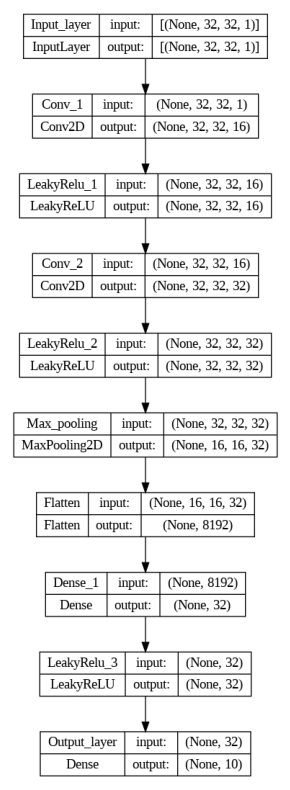

In [ ]:
# Representation of the nn_model_1 model
plot_nnmodel(cnn_model_1,'cnn_model_1',(4,10))

In [ ]:
# Compile the Sequential model
cnn_model_1.compile(

    # Set the loss function to categorical crossentropy
    loss='categorical_crossentropy',

    # Use the Adamax optimizer with a learning rate of 0.001
    optimizer=Adamax(learning_rate=0.001),

    # Specify the metric for evaluation as accuracy
    metrics=['accuracy']
)

In [ ]:
# Printing the model summary
cnn_model_1.summary()

Model: "cnn_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 LeakyRelu_1 (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 32, 32, 32)        4640      
                                                                 
 LeakyRelu_2 (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 Max_pooling (MaxPooling2D)  (None, 16, 16, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 8192)              0         
                                                                 
 Dense_1 (Dense)             (None, 32)                

In [ ]:
# Fit the CNN model on the training data
cnn_model_1_fit = cnn_model_1.fit(

    X_train_cnn_4D_normalized,  # Input: Normalized training images

    Y_train_cnn_encoded,        # Input: Encoded labels for training images

    epochs=20,                  # Training epochs

    validation_split=0.2,       # Validation split

    batch_size=32,              # Batch size

    verbose=1                   # Verbosity level during training

)

Epoch 1/20
1050/1050 [==============================] - 95s 89ms/step - loss: 1.6537 - accuracy: 0.4732 - val_loss: 0.9616 - val_accuracy: 0.7205
Epoch 2/20
1050/1050 [==============================] - 94s 89ms/step - loss: 0.7953 - accuracy: 0.7761 - val_loss: 0.6998 - val_accuracy: 0.8040
Epoch 3/20
1050/1050 [==============================] - 101s 96ms/step - loss: 0.6538 - accuracy: 0.8110 - val_loss: 0.6592 - val_accuracy: 0.8111
Epoch 4/20
1050/1050 [==============================] - 96s 92ms/step - loss: 0.5884 - accuracy: 0.8312 - val_loss: 0.5920 - val_accuracy: 0.8315
Epoch 5/20
1050/1050 [==============================] - 96s 92ms/step - loss: 0.5497 - accuracy: 0.8427 - val_loss: 0.6016 - val_accuracy: 0.8313
Epoch 6/20
1050/1050 [==============================] - 90s 86ms/step - loss: 0.5147 - accuracy: 0.8528 - val_loss: 0.5775 - val_accuracy: 0.8380
Epoch 7/20
1050/1050 [==============================] - 96s 91ms/step - loss: 0.4883 - accuracy: 0.8591 - val_loss: 0.5481 

### **Plot the Training and Validation Accuracies and Write your observations.**

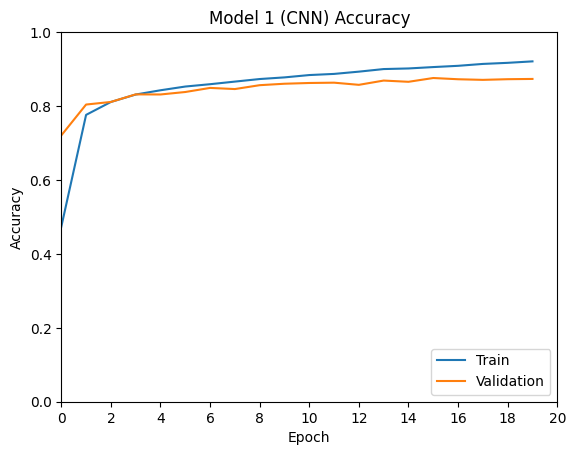

In [ ]:
# Plotting the model accuracy over epochs
fig = plt.figure()

# Retrieve and plot the training/validation accuracy
plt.plot(cnn_model_1_fit.history['accuracy'], label='Train')
plt.plot(cnn_model_1_fit.history['val_accuracy'], label='Validation')

# Title and labels for the plot
plt.title('Model 1 (CNN) Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Set x-axis ticks from 0 to 20
plt.xticks(range(0, 21, 2))
plt.xlim(0, 20)  # Adjust the range accordingly
plt.ylim(0, 1)   # Adjust the range accordingly

# Displaying the legend in the lower-left corner
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [ ]:
# Add entries to the DataFrame
new_data = {'Model': 'cnn_model_1', 'Dense': 2, 'Batch Norm.': 0, 'Dropout': 0, 'Conv.': 2, 'LeakyRelu': 3, 'Max-pooling': 1,
            'Optimizer': 'Adam(lr = 0.001)', 'Val. split': 0.2, 'Batch size': 32, 'Epochs': 20, 'Parameters': 267306,
            'Max. A': round(np.max(cnn_model_1_fit.history['accuracy']),2), 'Max. VA': round(np.max(cnn_model_1_fit.history['val_accuracy']),2)}

model_df = model_df.append(new_data, ignore_index=True)

# Display the new dataset
model_df.head()

,Model,Dense,Batch Norm.,Dropout,Conv.,LeakyRelu,Max-pooling,Optimizer,Val. split,Batch size,Epochs,Parameters,Max. A,Max. VA
0,nn_model_1,3,0,0,0,0,0,Adam(lr = 0.001),0.2,128,20,68010,0.69,0.68
1,nn_model_2,6,1,1,0,0,0,Adam(lr = 0.0005),0.2,128,30,310250,0.76,0.77
2,cnn_model_1,2,0,0,2,3,1,Adam(lr = 0.001),0.2,32,20,267306,0.92,0.88


**Observations:**

* This CNN model (cnn_model_1) is composed by two Dense layers, one Max-pooling layer, two Convolutional layers, and three Leaky ReLU layers, collectively training and learning 267,306 parameters (weights and biases).
* Convolutional layers efficiently capture spatial hierarchies, share parameters for translation-invariant learning, and exhibit computational efficiency in processing large-scale spatial data.
* Leaky ReLU layers mitigate the "dying ReLU" problem, promotes training of deeper networks, and provides robustness to noise by allowing a small, non-zero gradient for negative inputs.
* The Flatten layer simplifies multidimensional input, reducing model complexity and enabling compatibility with fully connected layers in neural networks.
* The plotted accuracy graph shows that after the initial 3-4 epochs, the validation accuracy is slightly lower than the training accuracy. The difference tend to increase, which suggests that the model is exhibiting signs of overfitting to the training data.
* Initially, the train accuracy increases fastly with the epochs. After around 3-4 epochs, the model's accuracy increases slowly, reaching values in the range of 0.90-0.92 and 0.86-0.88 for the validation set. Despite the model is exhibiting signs of overfitting, its accuracy stills better than the previous ANN models.
* This CNN model has less parameters than the previous ANN model, but required higher computational resources (local run time: $\sim$ 22.4 min), having a runtime several times higher than the previous ANN models.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
# Create a sequential model
cnn_model_2 = Sequential(name='cnn_model_2', layers=[

    # First Convolutional layer with 16 filters and the kernel size of 3x3. Use the 'same' padding and provide the input shape = (32, 32, 1)
    Conv2D(16, (3, 3), padding='same', input_shape=(32, 32, 1), name='Conv_1'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(alpha=0.1, name='LeakyRelu_1'),

    # Second Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    Conv2D(32, (3, 3), padding='same', name='Conv_2'),

    # Add LeakyRelu with the slope equal to 0.1
    LeakyReLU(alpha=0.1, name='LeakyRelu_2'),

    # Add a max-pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2, 2), name='Max_pooling_1'),

    # Add a BatchNormalization layer
    BatchNormalization(name='Batch_norm_1'),

    # Third Convolutional layer with 32 filters and the kernel size of 3x3 with 'same' padding
    Conv2D(32, (3, 3), padding='same', name='Conv_3'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(alpha=0.1, name='LeakyRelu_3'),

    # Fourth Convolutional layer 64 filters and the kernel size of 3x3 with 'same' padding
    Conv2D(64, (3, 3), padding='same', name='Conv_4'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(alpha=0.1, name='LeakyRelu_4'),

    # Add a max-pooling layer with a pool size of 2x2
    MaxPooling2D(pool_size=(2, 2), name='Max_pooling_2'),

    # Add a BatchNormalization layer
    BatchNormalization(name='Batch_norm_2'),

    # Flatten the output from the previous layer
    Flatten(name='Flatten'),

    # Add a dense layer with 32 nodes
    Dense(32, name='Dense_1'),

    # Add a LeakyRelu layer with the slope equal to 0.1
    LeakyReLU(alpha=0.1, name='LeakyRelu_5'),

    # Add a dropout layer with the rate equal to 0.5
    Dropout(0.5, name='Dropout_1'),

    # Add the final output layer with nodes equal to the number of classes, i.e., 10 and 'softmax' as the activation function
    Dense(10, activation='softmax', name='Output_layer')

])

In [ ]:
# Compile the cnn_model_2 model
cnn_model_2.compile(

    # Using the Adam optimizer with a learning rate of 0.001
    optimizer=tf.optimizers.Adam(learning_rate=0.001),

    # Employing categorical crossentropy as the loss function for a multi-class classification problem
    loss='categorical_crossentropy',

    # Evaluating the model's performance with the 'accuracy' metric
    metrics=['accuracy']

)

In [ ]:
# Print the model summary
cnn_model_2.summary()

Model: "cnn_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv_1 (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 LeakyRelu_1 (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 Conv_2 (Conv2D)             (None, 32, 32, 32)        4640      
                                                                 
 LeakyRelu_2 (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 Max_pooling_1 (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 Batch_norm_1 (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                                

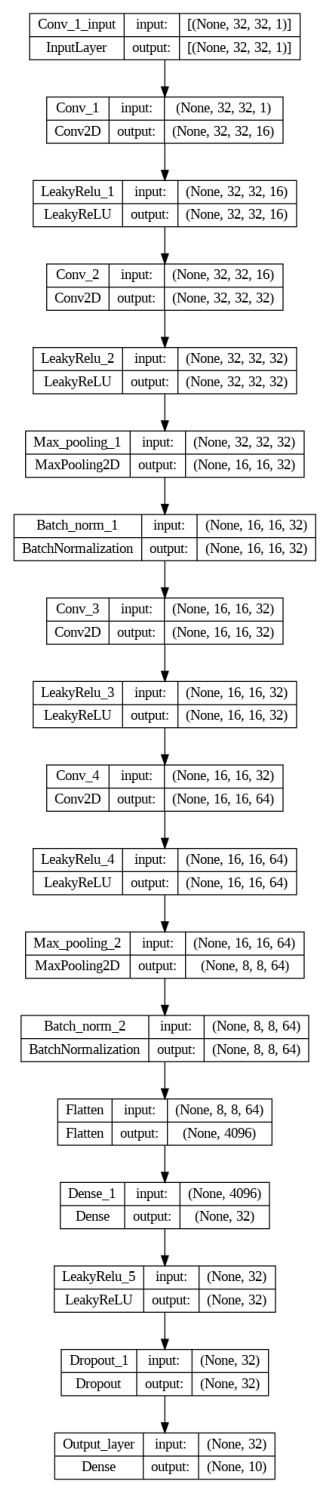

In [ ]:
# Representation of the nn_model_2 model
plot_nnmodel(cnn_model_2,'cnn_model_2',(4,22))

In [ ]:
# Fit the CNN model on the training data
cnn_model_2_fit = cnn_model_2.fit(

    X_train_cnn_4D_normalized,             # Input features of the training data

    Y_train_cnn_encoded,                   # Encoded labels of the training data

    epochs=30,                             # Number of training epochs

    validation_split=0.2,                  # Fraction of training data for validation

    batch_size=128,                        # Batch size for optimization

    verbose=1                              # Display progress during training

)

Epoch 1/30
263/263 [==============================] - 156s 586ms/step - loss: 1.3271 - accuracy: 0.5491 - val_loss: 1.8763 - val_accuracy: 0.3475
Epoch 2/30
263/263 [==============================] - 153s 583ms/step - loss: 0.6722 - accuracy: 0.7940 - val_loss: 0.5646 - val_accuracy: 0.8446
Epoch 3/30
263/263 [==============================] - 153s 580ms/step - loss: 0.5530 - accuracy: 0.8310 - val_loss: 0.4333 - val_accuracy: 0.8739
Epoch 4/30
263/263 [==============================] - 153s 581ms/step - loss: 0.4921 - accuracy: 0.8483 - val_loss: 0.4754 - val_accuracy: 0.8651
Epoch 5/30
263/263 [==============================] - 151s 575ms/step - loss: 0.4399 - accuracy: 0.8624 - val_loss: 0.3768 - val_accuracy: 0.8963
Epoch 6/30
263/263 [==============================] - 152s 579ms/step - loss: 0.4033 - accuracy: 0.8764 - val_loss: 0.3743 - val_accuracy: 0.8935
Epoch 7/30
263/263 [==============================] - 152s 580ms/step - loss: 0.3876 - accuracy: 0.8813 - val_loss: 0.3795 -

### **Plot the Training and Validation accuracies and write your observations.**

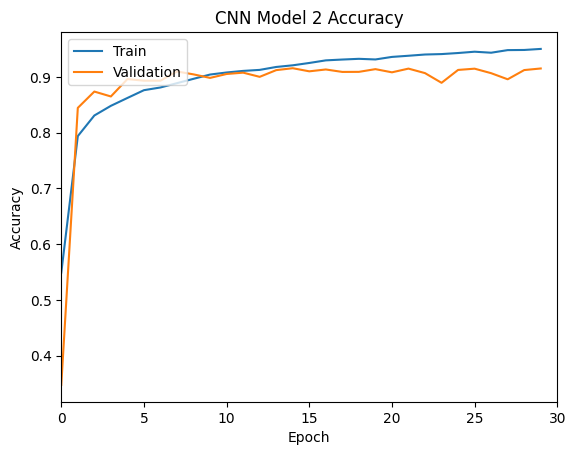

In [ ]:
# mudar eixos
fig = plt.figure()
plt.plot(cnn_model_2_fit.history['accuracy'])
plt.plot(cnn_model_2_fit.history['val_accuracy'])
plt.xlim(0, 30)  # Adjust the range accordingly
#plt.ylim(0, 1)   # Adjust the range accordingly
plt.title('CNN Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper left')

# Display the plot
plt.show()

In [ ]:
# Add entries to the DataFrame
new_data = {'Model': 'cnn_model_2', 'Dense': 2, 'Batch Norm.': 2, 'Dropout': 1, 'Conv.': 4, 'LeakyRelu': 5, 'Max-pooling': 2,
            'Optimizer': 'Adam(lr = 0.001)', 'Val. split': 0.2, 'Batch size': 128, 'Epochs': 30, 'Parameters': 164362,
            'Max. A': round(np.max(cnn_model_2_fit.history['accuracy']),2), 'Max. VA': round(np.max(cnn_model_2_fit.history['val_accuracy']),2)}

model_df = model_df.append(new_data, ignore_index=True)

# Display the new dataset
model_df.head()

,Model,Dense,Batch Norm.,Dropout,Conv.,LeakyRelu,Max-pooling,Optimizer,Val. split,Batch size,Epochs,Parameters,Max. A,Max. VA
0,nn_model_1,3,0,0,0,0,0,Adam(lr = 0.001),0.2,128,20,68010,0.69,0.68
1,nn_model_2,6,1,1,0,0,0,Adam(lr = 0.0005),0.2,128,30,310250,0.76,0.77
2,cnn_model_1,2,0,0,2,3,1,Adam(lr = 0.001),0.2,32,20,267306,0.92,0.88
3,cnn_model_2,2,2,1,4,5,2,Adam(lr = 0.001),0.2,128,30,164362,0.95,0.92


**Observations:**

* This CNN model, denoted as cnn_model_2, comprises two Dense layers, two Max-pooling layers, four Convolutional layers, five Leaky ReLU layers, two Batch Normalization layers, one Dropout layer, and one Flatten layer. In total, the model is trained with 164,362 parameters, including weights and biases.
* The plotted accuracy graph shows that after 9 epochs, the validation accuracy is lower than the training accuracy. The difference tends to increase, which suggests that the model is exhibiting signs of overfitting to the training data.
* The behavior of this model is similar to the previous CNN model (cnn_model_1). However, the achieved validation accuracies are slightly higher. Despite the model exhibiting signs of overfitting, its validation accuracy stills slightly better than the previous CNN model.
* This model has less parameters than the previous CNN model (cnn_model_1), but required higher computational resources (local run time: $\sim$ 60 min), having a runtime of a few times the previous CNN model (cnn_model_1).

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Making predictions on the test data
Y_pred_test_cnn = cnn_model_2.predict(X_test_cnn_4D_normalized)

563/563 [==============================] - 21s 38ms/step


In [ ]:
# Print the first prediction
print('> First prediction:\n\n',Y_pred_test_cnn[0])

> First prediction:

 [2.35896412e-04 9.99762297e-01 1.33756270e-10 8.39403894e-12
 1.65953907e-06 4.08112389e-12 2.10422657e-09 1.18621408e-07
 5.28602300e-08 1.09562635e-08]


In [ ]:
# Converting probabilities to class labels
Y_pred_test_cnn_classes = np.argmax(Y_pred_test_cnn, axis = 1)

In [ ]:
# Print the first prediction (class)
print('> First prediction (class):',Y_pred_test_cnn_classes[0])

> First prediction (class): 1


In [ ]:
# Calculating the probability of the predicted class
Y_pred_test_cnn_max_probas = np.max(Y_pred_test_cnn, axis = 1)

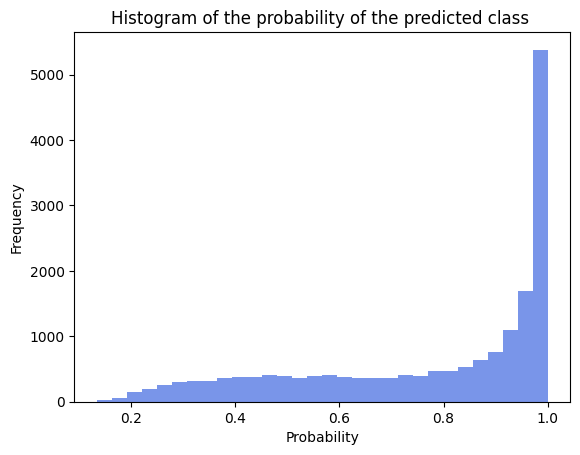

In [ ]:
# Distribution of the probability of the predicted class
plt.hist(Y_pred_test_nn_max_probas, bins=30, color='royalblue', alpha=0.7) #, edgecolor='black'
plt.title('Histogram of the probability of the predicted class ')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Printing the classification report
print(classification_report(Y_test_cnn, Y_pred_test_cnn_classes))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.89      0.93      0.91      1828
           2       0.94      0.90      0.92      1803
           3       0.90      0.89      0.89      1719
           4       0.94      0.92      0.93      1812
           5       0.90      0.92      0.91      1768
           6       0.92      0.88      0.90      1832
           7       0.92      0.94      0.93      1808
           8       0.93      0.88      0.90      1812
           9       0.90      0.92      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



In [ ]:
# Save precision, recall, f1-score
precision_m2_cnn, recall_m2_cnn, f1_m2_cnn, _ = precision_recall_fscore_support(Y_test_cnn, Y_pred_test_cnn_classes)

In [ ]:
# Plotting the heatmap using confusion matrix

# Calculating the confusion matrix
cm = confusion_matrix(Y_test_cnn, Y_pred_test_cnn_classes)

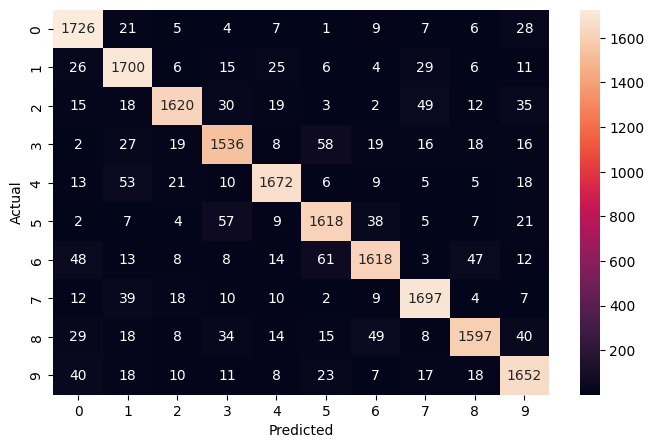

In [ ]:
# Setting up the figure size
plt.figure(figsize=(8, 5))

# Creating a heatmap with annotations
sns.heatmap(cm, annot=True, fmt='.0f')

# Adding labels to axes
plt.ylabel('Actual')
plt.xlabel('Predicted')

# Displaying the plot
plt.show()

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:**

* The average precision, recall, and f1-score stand at approximately 0.91, underscoring the model's performance across diverse categories. Notably, this model outperforms the nn_model_2 model and demonstrates a considerable overall performance.
* In most actual/prediction combinations, the counts are relatively lower compared to the predictions made by the nn_model_2 model.
* If it is necessary to improve the average precision, recall and f1-score to higher values, different CNN architectures should be considered.

**Model comparison:**

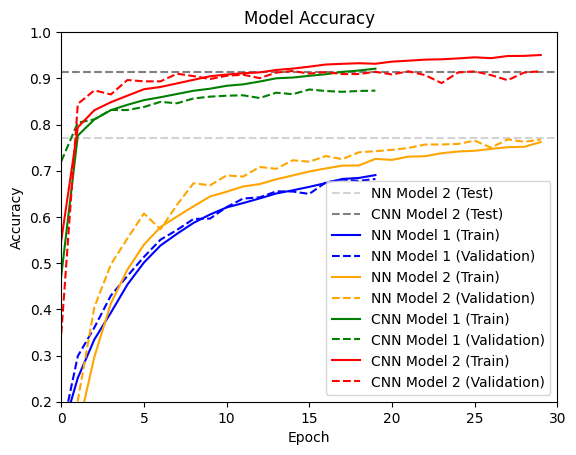

In [ ]:
# Plotting the data with different linestyles
fig = plt.figure()
plt.plot([0,30],[precision_m2_nn.mean(),precision_m2_nn.mean()], linestyle='--', color='lightgrey')
plt.plot([0,30],[precision_m2_cnn.mean(),precision_m2_cnn.mean()], linestyle='--', color='grey')
plt.plot(nn_model_1_fit.history['accuracy'], linestyle='-', color='blue')
plt.plot(nn_model_1_fit.history['val_accuracy'], linestyle='--', color='blue')
plt.plot(nn_model_2_fit.history['accuracy'], linestyle='-', color='orange')
plt.plot(nn_model_2_fit.history['val_accuracy'], linestyle='--', color='orange')
plt.plot(cnn_model_1_fit.history['accuracy'], linestyle='-', color='green')
plt.plot(cnn_model_1_fit.history['val_accuracy'], linestyle='--', color='green')
plt.plot(cnn_model_2_fit.history['accuracy'], linestyle='-', color='red')
plt.plot(cnn_model_2_fit.history['val_accuracy'], linestyle='--', color='red')

# Set x-axis and y-axis limits
plt.xlim(0, 30)  # Replace max_epoch_value with the actual maximum epoch value
plt.ylim(0.2, 1)  # Set your desired y-axis limits

# Set labels and title
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Add legend below and to the right
plt.legend(['NN Model 2 (Test)','CNN Model 2 (Test)','NN Model 1 (Train)', 'NN Model 1 (Validation)', 'NN Model 2 (Train)', 'NN Model 2 (Validation)',
            'CNN Model 1 (Train)', 'CNN Model 1 (Validation)', 'CNN Model 2 (Train)', 'CNN Model 2 (Validation)'],
           loc='lower right') #, bbox_to_anchor=(1.25, 0.5)

# Display the plot
plt.show()

**Final Observations:**

* The CNN models demonstrate superior accuracies and validation accuracies compared to the NN models. Additionally, CNN models converge faster to higher accuracies than NN models.
* While NN models do not exhibit signs of overfitting to the training data, CNN models show indications of overfitting. Despite this, CNN validation accuracies consistently surpass NN validation accuracies.
* In NN models, a higher number of epochs significantly impacts accuracy. Conversely, in CNN models, the increase in accuracy slows down for higher epochs, and the validation set reaches a plateau.
* The average precision obtained from the test dataset, represented by grey lines, aligns with the validation accuracy.
* Notably, the last model (cnn_model_2) exhibits the best performance among the models.

In [ ]:
# Display the model_df dataset
model_df.head()

,Model,Dense,Batch Norm.,Dropout,Conv.,LeakyRelu,Max-pooling,Optimizer,Val. split,Batch size,Epochs,Parameters,Max. A,Max. VA
0,nn_model_1,3,0,0,0,0,0,Adam(lr = 0.001),0.2,128,20,68010,0.69,0.68
1,nn_model_2,6,1,1,0,0,0,Adam(lr = 0.0005),0.2,128,30,310250,0.76,0.77
2,cnn_model_1,2,0,0,2,3,1,Adam(lr = 0.001),0.2,32,20,267306,0.92,0.88
3,cnn_model_2,2,2,1,4,5,2,Adam(lr = 0.001),0.2,128,30,164362,0.95,0.92


**Final Observations:**

* Adding more layers does not necessarily lead to an increase in network parameters (weights and biases).
* The runtime follows the model index order, increasing with each subsequent model. This increase is primarily influenced by the nature of the layers rather than the number of parameters, which actually decreases after the second NN model.

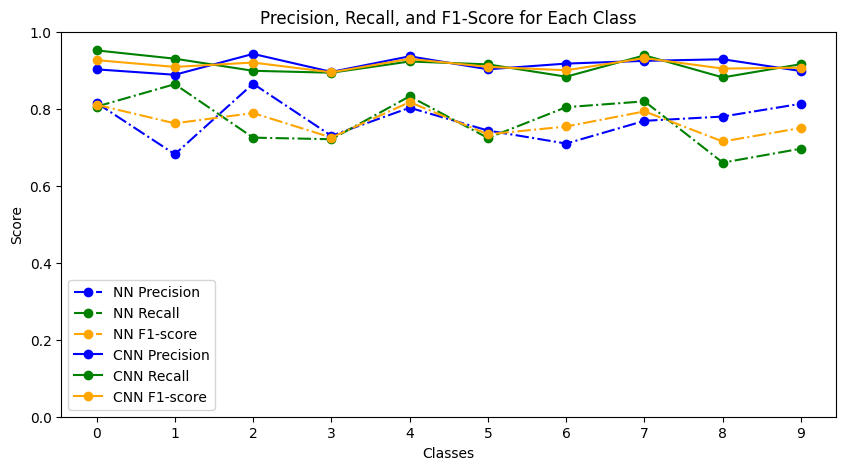

In [ ]:
# Plotting precision, recall, and f1-score for the different classes
fig, ax = plt.subplots(figsize=(10, 5))
classes = [str(i) for i in range(10)]
ax.plot(classes, precision_m2_nn, label='NN Precision', marker='o', color='blue', linestyle='-.')
ax.plot(classes, recall_m2_nn, label='NN Recall', marker='o', color='green', linestyle='-.')
ax.plot(classes, f1_m2_nn, label='NN F1-score', marker='o', color='orange', linestyle='-.')
ax.plot(classes, precision_m2_cnn, label='CNN Precision', marker='o', color='blue', linestyle='-')
ax.plot(classes, recall_m2_cnn, label='CNN Recall', marker='o', color='green', linestyle='-')
ax.plot(classes, f1_m2_cnn, label='CNN F1-score', marker='o', color='orange', linestyle='-')

ax.set_xlabel('Classes')
ax.set_ylabel('Score')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.legend()
ax.set_ylim([0, 1])
plt.show()

**Final Observations:**

* CNN models consistently exhibit higher precision, recall, and F1-score across all classes.
* In contrast, NN models show larger variations between precision, recall, and F1-score for the same class and across different classes.